# Determining the average pay for a pilot over 17 years at an airline
Seniority is everything as an airline pilot. Senior pilots will be far more likely to maintain their jobs, aircraft positions, and a high quality of life. As soon as a pilot switches airlines, they lose their seniority.  So determining which airline will pay the most over the course of a career is very important.  luckily there is a website, `Airline Pilot Central` (airlinepilotcentral.com) that has data on every year of seniority at an airlines.  I scraped their websites and put together some graphs to look at the average salary of a pilot over the course of a career

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

The information was on different webpages, separated by airline. Needed 4 lists all together:
- one list for national airlines (the second tier airlines)
- one list for legacy airlines (the largest airlines)
- one with a full airline name to call the webpage
- one with a simpler name for dataFrame purposes


In [2]:
nationals = ['airbahn_airlines', 'avelo_airlines', 'frontier_airlines', 'southwest_airlines', 'allegiant_air', 'breeze_airways', 'jetblue_airways', 'spirit_airlines']
nationals_format = [airline.split('_')[0] for airline in nationals]
legacy = ['alaska_airlines', 'delta_air_lines', 'united_airlines', 'american_airlines', 'hawaiian_airlines']
legacy_format = [airline.split('_')[0] for airline in legacy]

In [3]:
nationals_format

['airbahn',
 'avelo',
 'frontier',
 'southwest',
 'allegiant',
 'breeze',
 'jetblue',
 'spirit']

In [4]:
legacy_format

['alaska', 'delta', 'united', 'american', 'hawaiian']

In [5]:
url_national = "https://www.airlinepilotcentral.com/airlines/major-national-lcc/{}"
url_legacy = "https://www.airlinepilotcentral.com/airlines/legacy/{}"

In [6]:
for airline, airline_format in zip(nationals, nationals_format):
    national_request = requests.get(url_national.format(airline))
    with open("raw_sites/{}.html".format(airline_format), "w+", encoding="utf-8") as national_f:
        national_f.write(national_request.text)

In [7]:
for airline, airline_format in zip(legacy, legacy_format):
    legacy_request = requests.get(url_legacy.format(airline))
    with open("raw_sites/{}.html".format(airline_format), "w+", encoding="utf-8") as legacy_f:
        legacy_f.write(legacy_request.text)

Each webpage had two tables: one for First Officer Pay (copilot) and one for the Captain.

I needed to instantiate the dataframes with a 'Year' column so I could merge them all together.

In [8]:
national_captain_pay = pd.DataFrame(columns=['Year'])
national_first_pay = pd.DataFrame(columns=['Year'])
legacy_captain_pay = pd.DataFrame(columns=['Year'])
legacy_first_pay = pd.DataFrame(columns=['Year'])

The national airlines and the legacy airlines had different web addresses, so I needed to read them into the program separately.  I started with the national airlines

In [9]:
for airline in nationals_format:
    with open("raw_sites/{}.html".format(airline), encoding="utf-8") as national_airline_g:
        national_airline_page = national_airline_g.read()


    national_airline_soup = BeautifulSoup(national_airline_page, "html.parser")
    national_airline_tables = national_airline_soup.findAll('table', class_="table table-striped antiscroll-content")
    national_airline_table = pd.read_html(str(national_airline_tables))

# A few tables had empty columns, so any column missing columns was dropped
    national_airline_captain = national_airline_table[0].dropna(axis=1)
    national_airline_first = national_airline_table[1].dropna(axis=1)

# I added a suffix to each column so I would be able to differentiate between Airlines.
    national_airline_captain = national_airline_captain.add_suffix("_{}".format(airline))
# Then I needed to remove that suffix from the Year column, so they all had a common column to merge
    national_airline_captain = national_airline_captain.rename(columns={'Year_{}'.format(airline): 'Year'})

# Do the same for the first pilot table
    national_airline_first = national_airline_first.add_suffix("_{}".format(airline))
    national_airline_first = national_airline_first.rename(columns={'Year_{}'.format(airline): 'Year'})

    national_captain_pay = national_captain_pay.merge(national_airline_captain, how='outer')
    national_first_pay = national_first_pay.merge(national_airline_first, how='outer')

# I sorted the dataframe by Year to get the 1st Year pay at the top of the table
national_captain_pay = national_captain_pay.sort_values('Year')
national_first_pay = national_first_pay.sort_values('Year')

All but 5 airlines had a payscale that went up to 12 years, so I filled in the missing airline data with the max posted salary for each airline to fill out the dataframe.

In [10]:
national_captain_pay['A320_airbahn'] = national_captain_pay['A320_airbahn'].fillna(222)
national_captain_pay['All_avelo'] = national_captain_pay['All_avelo'].fillna(220)
national_captain_pay['E190_breeze'] = national_captain_pay['E190_breeze'].fillna(174)
national_captain_pay['E195_breeze'] = national_captain_pay['E195_breeze'].fillna(174)
national_captain_pay['A220_breeze'] = national_captain_pay['A220_breeze'].fillna(196)

As you'll see in the cell below, the columns are separated into different plane/airline options.  This is becuase flying certain planes pays better than others. There are also some airlines that either pay the same for all planes, or only have one model they fly.  Those columns are signified by `All_(airline)`

In [11]:
national_captain_pay

,Year,A320_airbahn,All_avelo,All_frontier,737_southwest,All_allegiant,E190_breeze,E195_breeze,A220_breeze,A320_jetblue,A321_jetblue,E190_jetblue,A220_jetblue,A319_spirit,A320_spirit,A321_spirit
4,1,202.0,200.0,191,241,163,129.0,129.0,131.0,240,240,197,230,189,189,189
3,2,208.0,205.0,206,244,170,142.0,142.0,160.0,243,243,199,233,205,205,205
2,3,212.0,210.0,210,247,176,155.0,155.0,174.0,246,246,201,236,208,208,208
1,4,218.0,215.0,214,250,184,159.0,159.0,179.0,249,249,203,239,212,212,212
0,5,222.0,220.0,216,253,191,164.0,164.0,184.0,252,252,205,242,214,214,214
11,6,222.0,220.0,218,256,197,170.0,170.0,191.0,255,255,207,245,216,216,216
10,7,222.0,220.0,222,259,202,174.0,174.0,196.0,259,259,210,248,220,220,220
9,8,222.0,220.0,228,262,209,174.0,174.0,196.0,262,262,212,251,226,226,226
8,9,222.0,220.0,234,265,214,174.0,174.0,196.0,265,265,214,254,232,232,232
7,10,222.0,220.0,240,268,219,174.0,174.0,196.0,268,268,216,257,238,238,238


I made the assumption a pilot was First Officer for an average of 5 years, so I only needed the first 5 years of data from the `first_pay` dataframe

In [12]:
national_first_pay.loc[:5, :]

,Year,A320_airbahn,All_avelo,All_frontier,737_southwest,All_allegiant,E190_breeze,E195_breeze,A220_breeze,A320_jetblue,A321_jetblue,E190_jetblue,A220_jetblue,A319_spirit,A320_spirit,A321_spirit
4,1,93.0,90.0,59,84,57,61.0,61.0,68.0,92,92,92,92,59,59,59
3,2,103.0,110.0,111,122,102,92.0,92.0,102.0,125,125,103,120,111,111,111
2,3,108.0,120.0,120,136,110,96.0,96.0,107.0,146,146,119,140,119,119,119
1,4,115.0,130.0,127,150,116,101.0,101.0,113.0,158,158,123,151,126,126,126
0,5,125.0,140.0,134,164,122,107.0,107.0,120.0,162,162,128,155,133,133,133
11,6,NaN,NaN,140,171,128,110.0,110.0,124.0,164,164,133,157,139,139,139
10,7,NaN,NaN,146,176,134,116.0,116.0,130.0,167,167,137,160,145,145,145
9,8,NaN,NaN,151,180,138,NaN,NaN,NaN,170,170,139,162,150,150,150
8,9,NaN,NaN,157,182,143,NaN,NaN,NaN,173,173,143,166,156,156,156
7,10,NaN,NaN,161,187,147,NaN,NaN,NaN,178,178,144,171,160,160,160


With the National Airline DataFrames complete, I had to do the same for the legacy airlines

In [13]:
for airline in legacy_format:
    with open("raw_sites/{}.html".format(airline), encoding="utf-8") as legacy_airline_g:
        legacy_airline_page = legacy_airline_g.read()


    legacy_airline_soup = BeautifulSoup(legacy_airline_page, "html.parser")
    legacy_airline_tables = legacy_airline_soup.findAll('table', class_="table table-striped antiscroll-content")
    legacy_airline_table = pd.read_html(str(legacy_airline_tables))

    legacy_airline_captain = legacy_airline_table[0].dropna(axis=1)
    legacy_airline_first = legacy_airline_table[1].dropna(axis=1)

    legacy_airline_captain = legacy_airline_captain.add_suffix("_{}".format(airline))
    legacy_airline_captain = legacy_airline_captain.rename(columns={'Year_{}'.format(airline): 'Year'})

    legacy_airline_first = legacy_airline_first.add_suffix("_{}".format(airline))
    legacy_airline_first = legacy_airline_first.rename(columns={'Year_{}'.format(airline): 'Year'})

    legacy_captain_pay = legacy_captain_pay.merge(legacy_airline_captain, how='outer')
    legacy_first_pay = legacy_first_pay.merge(legacy_airline_first, how='outer')

legacy_captain_pay = legacy_captain_pay.sort_values('Year')
legacy_first_pay = legacy_first_pay.sort_values('Year')

to make my DataFrame cleaner(and analysis easier) I set the indexis to be the year.

In [14]:
legacy_captain_pay = legacy_captain_pay.set_index('Year')
legacy_first_pay = legacy_first_pay.set_index('Year')

national_captain_pay = national_captain_pay.set_index('Year')
national_first_pay = national_first_pay.set_index('Year')

In [24]:
pd.set_option('display.max_columns', 50)
legacy_captain_pay

,B737_alaska,737-800_delta,737-900_delta,757-300_delta,767-300_delta,767-400ER_delta,A319_delta,A320_delta,A321_delta,A330-200_delta,B717_delta,A350_delta,A330-900_delta,A220_delta,757-200_united,777_united,A319_united,A320_united,737-7_united,737-8_united,737-9_united,757-3_united,767-2_united,767-3_united,767-4_united,787_united,737_american,777_american,A320_american,787_american,717_hawaiian,A321_hawaiian,A330_hawaiian
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,226,261,262,269,269,307,251,251,262,307,235,325,311,238,260,323,249,260,249,260,260,267,267,267,323,323,255,314,255,314,220,245,300
2,227,263,264,272,272,309,253,253,264,309,236,327,313,240,262,325,251,262,251,262,262,269,269,269,325,325,257,316,257,316,222,247,303
3,230,265,266,274,274,312,255,255,266,312,238,330,316,242,264,328,253,264,253,264,264,271,271,271,328,328,259,319,259,319,224,249,305
4,232,267,268,276,276,314,257,257,268,314,240,333,318,244,266,331,255,266,255,266,266,273,273,273,331,331,261,322,261,322,226,251,308
5,234,269,270,278,278,317,260,260,270,317,242,335,321,246,268,333,257,268,257,268,268,276,276,276,333,333,263,324,263,324,227,253,310
6,236,271,273,281,281,320,262,262,273,320,244,338,324,248,270,336,259,270,259,270,270,278,278,278,336,336,266,327,266,327,229,255,313
7,239,273,275,283,283,322,264,264,275,322,246,341,326,250,273,339,261,273,261,273,273,280,280,280,339,339,268,329,268,329,231,257,315
8,244,276,277,285,285,324,266,266,277,324,248,343,329,252,275,341,263,275,263,275,275,282,282,282,341,341,270,332,270,332,233,259,318
9,250,278,279,287,287,327,268,268,279,327,250,346,331,254,277,344,265,277,265,277,277,284,284,284,344,344,272,334,272,334,235,261,320


In [30]:
legacy_first_pay[:5]

,B737_alaska,A319_delta,A320_delta,A321_delta,B717_delta,A350_delta,B738_delta,B739_delta,B763ER_delta,B764ER_delta,A332_delta,B757_delta,A330-900_delta,A220_delta,737-500_united,737-700_united,737-800_united,737-900_united,757-200_united,757-300_united,767-200_united,767-300_united,767-400_united,777_united,A319_united,A320_united,787_united,737_american,777_american,A320_american,787_american,717_hawaiian,A321_hawaiian,A330_hawaiian
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,93,92,92,92,92,92,92,92,92,92,92,92,92,92,91,91,91,91,91,91,91,91,91,91,91,91,91,90,90,90,90,36,36,36
2,130,136,136,141,126,175,141,141,145,165,165,145,168,128,134,134,140,140,140,144,144,144,174,174,134,140,174,137,169,137,169,111,122,150
3,142,159,159,165,148,205,164,165,170,194,194,170,196,150,157,157,164,164,164,168,168,168,204,204,157,164,204,161,198,161,198,127,142,174
4,153,162,162,169,152,210,168,169,174,198,198,174,201,154,161,161,168,168,168,173,173,173,209,209,161,168,209,165,203,165,203,135,151,184
5,157,166,166,173,155,215,172,173,178,203,203,178,206,158,165,165,172,172,172,177,177,177,214,214,165,172,214,169,208,169,208,141,157,192


With all four DataFrames cleaned up, it's time to do a little analysis!

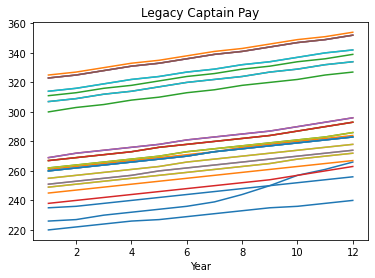

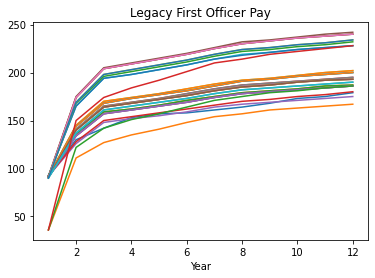

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

legacy_captain_pay.plot.line(legend=False)
plt.title('Legacy Captain Pay')
plt.show()

legacy_first_pay.plot.line(legend=False)
plt.title('Legacy First Officer Pay')
plt.show()

Looking at Legacy airlines, the pay pattern seems to be pretty standard throughout the career:
- Starting as a First Officer, pay gains quite a bit over the first 5 years.
- With the exception of Hawaiaan Airlines, all First Officers start between $91-93,000
- Hawaiian Airlines' First Officers get paid significantly less money to start, but build up to be closer to the average pay
- After that intial steep gain, the pay has a consistent raise over the years

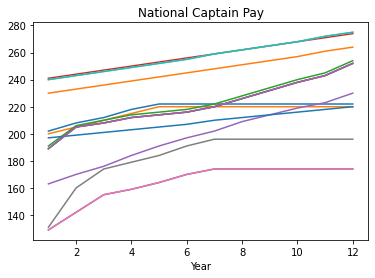

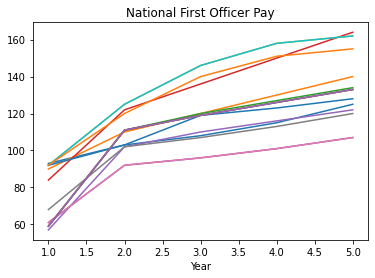

In [32]:
national_captain_pay.plot.line(legend=False)
plt.title('National Captain Pay')
plt.show()

national_first_pay[:5].plot.line(legend=False)
plt.title('National First Officer Pay')
plt.show()

National Airlines pay schedules aren't as tightly connected, but all of them have around the same pattern, especially for first officers' pay.
- first officers have a very steep pay increase over the first 2-3 years, and then a less steep, but still consistent pay raise over the years.

In [17]:
leg_first_five = legacy_first_pay[:5]
nat_first_five = national_first_pay[:5]

In [33]:
leg_first_five

,B737_alaska,A319_delta,A320_delta,A321_delta,B717_delta,A350_delta,B738_delta,B739_delta,B763ER_delta,B764ER_delta,A332_delta,B757_delta,A330-900_delta,A220_delta,737-500_united,737-700_united,737-800_united,737-900_united,757-200_united,757-300_united,767-200_united,767-300_united,767-400_united,777_united,A319_united,A320_united,787_united,737_american,777_american,A320_american,787_american,717_hawaiian,A321_hawaiian,A330_hawaiian
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,93,92,92,92,92,92,92,92,92,92,92,92,92,92,91,91,91,91,91,91,91,91,91,91,91,91,91,90,90,90,90,36,36,36
2,130,136,136,141,126,175,141,141,145,165,165,145,168,128,134,134,140,140,140,144,144,144,174,174,134,140,174,137,169,137,169,111,122,150
3,142,159,159,165,148,205,164,165,170,194,194,170,196,150,157,157,164,164,164,168,168,168,204,204,157,164,204,161,198,161,198,127,142,174
4,153,162,162,169,152,210,168,169,174,198,198,174,201,154,161,161,168,168,168,173,173,173,209,209,161,168,209,165,203,165,203,135,151,184
5,157,166,166,173,155,215,172,173,178,203,203,178,206,158,165,165,172,172,172,177,177,177,214,214,165,172,214,169,208,169,208,141,157,192


## Average Pay among Airlines

It's not certain when a pilot joins an airline what they will be flying.  So a more appropriate way to look at the data is averaging pay among the Airlines.

I started working with the First Officer data

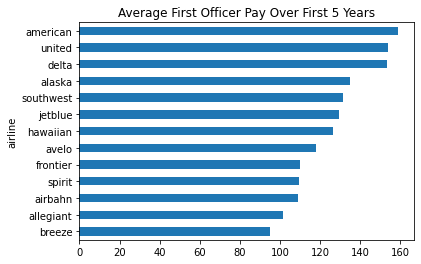

In [35]:

mean_legacy_first_five = leg_first_five.mean()
mean_national_first_five = nat_first_five.mean()

legacy_mean_first = pd.DataFrame(mean_legacy_first_five, columns=['Average 5yr pay - First Officer'])
nat_mean_first = pd.DataFrame(mean_national_first_five, columns=['Average 5yr pay - First Officer'])

# After finding the mean pay for each plane/airline duo, I split the columnn names and kept the airline, so I could group columns by airline.
legacy_mean_first['airline'] = legacy_mean_first.index.str.split('_').str[-1]
nat_mean_first['airline'] = nat_mean_first.index.str.split('_').str[-1]

# Once columns were grouped by airlines, I found the mean airline pay for each company.
mean_first_airline = legacy_mean_first.groupby('airline').mean()
nat_mean_first_airline = nat_mean_first.groupby('airline').mean()

#for a more compact table, I concated the two dataframes together
mean_first_airline = pd.concat([mean_first_airline, nat_mean_first_airline])

#To visualize the data better, I sorted by the average annual pay.
mean_first_airline = mean_first_airline.sort_values('Average 5yr pay - First Officer')

mean_first_airline.plot.barh(legend=False)
plt.title("Average First Officer Pay Over First 5 Years")
plt.show()

I did the same for the captain payscales.

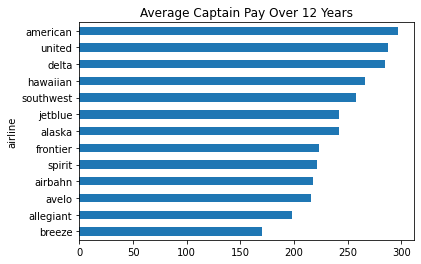

In [20]:
mean_legacy_captain = legacy_captain_pay.mean()
mean_national_captain = national_captain_pay.mean()

leg_mean_captain = pd.DataFrame(mean_legacy_captain, columns=['Average Captain Pay Over 12 Years'])
nat_mean_captain = pd.DataFrame(mean_national_captain, columns=['Average Captain Pay Over 12 Years'])

leg_mean_captain['airline'] = leg_mean_captain.index.str.split('_').str[-1]
nat_mean_captain['airline'] = nat_mean_captain.index.str.split('_').str[-1]

leg_mean_captain_airline = leg_mean_captain.groupby('airline').mean()
nat_mean_captain_airline = nat_mean_captain.groupby('airline').mean()

mean_captain_airline = pd.concat([leg_mean_captain_airline, nat_mean_captain_airline])
mean_captain_airline = mean_captain_airline.sort_values('Average Captain Pay Over 12 Years')

mean_captain_airline.plot.barh(legend=False)
plt.title("Average Captain Pay Over 12 Years")
plt.show()


For one last visualization, I added the two datasets together to get a more full idea of the career pay of a pilot:
- I joined the 5 year First Officer data with the Captain data
- I found the mean of all 17 years to get an average annual pay 

In [22]:
all_airline_pay = mean_captain_airline.join(mean_first_airline)
all_airline_pay['17 year average'] = ((all_airline_pay['Average Captain Pay Over 12 Years'] * 12) + (all_airline_pay['Average 5yr pay - First Officer'] * 5)) / 17

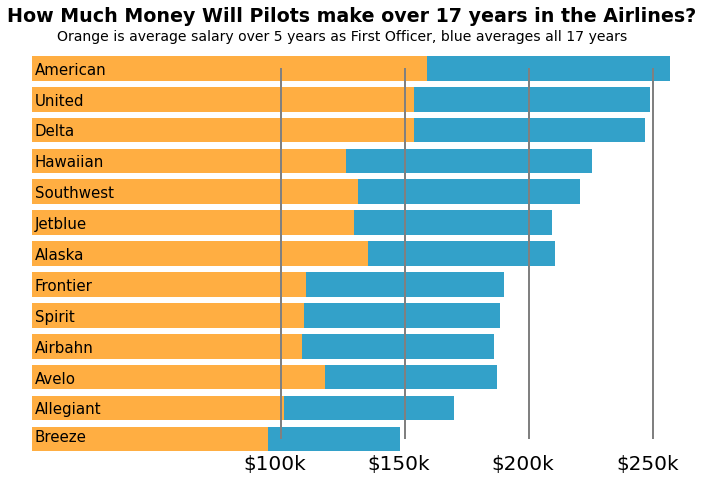

In [37]:
fig, ax1= plt.subplots(figsize=(12, 8))

for location in ['right', 'top', 'left', 'bottom']:
    ax1.spines[location].set_visible(False)

ax1.barh(all_airline_pay.index, all_airline_pay['17 year average'], linewidth=3, label = "Federal Reserve Prime Rate", color= "#33A1C9")
ax1.barh(all_airline_pay.index, all_airline_pay['Average 5yr pay - First Officer'], linewidth=3, label = "Federal Reserve Prime Rate", color= "#ffae42")
# ax1.text(70, 7.9, '5 Years as first Officer')
# ax1.text(155, 7.9, 'Average Pay over 17 Years')
ax1.vlines(100, ymin=0, ymax =12, lw=2, color='grey', alpha=1)
ax1.vlines(150, ymin=0, ymax =12, lw=2, color='grey', alpha=1)
ax1.vlines(200, ymin=0, ymax =12, lw=2, color='grey', alpha=1)
ax1.vlines(250, ymin=0, ymax =12, lw=2, color='grey', alpha=1)
ax1.text(85, -1, '$100k', size=20)
ax1.text(135, -1, '$150k', size=20)
ax1.text(185, -1, '$200k', size=20)
ax1.text(235, -1, '$250k', size=20)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.tick_params(bottom=False, left=False)
ax1.text(1, 11.8, 'American', size=15)
ax1.text(1, 10.8, 'United', size=15)
ax1.text(1, 9.8, 'Delta', size=15)
ax1.text(1, 8.8, 'Hawaiian', size=15)
ax1.text(1, 7.8, 'Southwest', size=15)
ax1.text(1, 6.8, 'Jetblue', size=15)
ax1.text(1, 5.8, 'Alaska', size=15)
ax1.text(1, 4.8, 'Frontier', size=15)
ax1.text(1, 3.8, 'Spirit', size=15)
ax1.text(1, 2.8, 'Airbahn', size=15)
ax1.text(1, 1.8, 'Avelo', size=15)
ax1.text(1, 0.8, 'Allegiant', size=15)
ax1.text(1, -.1, 'Breeze', size=15)
ax1.text(-10, 13.5, "How Much Money Will Pilots make over 17 years in the Airlines?", size=19, weight='bold')
ax1.text(10, 12.9, "Orange is average salary over 5 years as First Officer, blue averages all 17 years", size=14)
plt.show()